In [1]:
pip install opencv-python tensorflow keras

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 25.9 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 3.3.3
    Uninstalling keras-3.3.3:
      Successfully uninstalled keras-3.3.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-decision-forests 1.8.1 requires wurlitzer, which is not installed.
Note: you may need to restart the kernel to use updated packages.


In [2]:
import os
import cv2
import numpy as np
from tensorflow.keras.utils import to_categorical

2024-06-12 06:25:21.143837: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-12 06:25:21.143992: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-12 06:25:21.310221: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


**Loading the Dataset**

In [3]:
# Define paths
data_dir = "/kaggle/input/asl-alphabet/asl_alphabet_train/asl_alphabet_train"
categories = os.listdir(data_dir)
img_size = 64

**Pre-Processing the Data**

In [4]:
# Function to create training data
def create_training_data():
    training_data = []
    for category in categories:
        path = os.path.join(data_dir, category)
        class_num = categories.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                resized_array = cv2.resize(img_array, (img_size, img_size))
                training_data.append([resized_array, class_num])
            except Exception as e:
                pass
    return training_data

training_data = create_training_data()
print(f"Number of samples: {len(training_data)}")

Number of samples: 87000


In [5]:
# Shuffle and split the data
import random
random.shuffle(training_data)

X = []
y = []

for features, label in training_data:
    X.append(features)
    y.append(label)

X = np.array(X).reshape(-1, img_size, img_size, 1) / 255.0
y = to_categorical(y, num_classes=len(categories))

**Building a CNN model**

In [6]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential()

# First convolutional layer
model.add(Conv2D(64, (3, 3), activation='relu', input_shape=(img_size, img_size, 1)))
model.add(MaxPooling2D((2, 2)))

# Second convolutional layer
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

# Flatten and dense layers
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(len(categories), activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2  (None, 31, 31, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 14, 14, 128)       0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 128)               3

In [7]:
# TensorFlow GPU configuration
config = tf.compat.v1.ConfigProto()
config.gpu_options.allow_growth = True
session = tf.compat.v1.Session(config=config)

**Training the model with 10 Epochs**

In [8]:
# Epoch 1
model.fit(X, y, epochs=1, validation_split=0.2)

2175/2175 [==============================] - 505s 231ms/step - loss: 0.8888 - accuracy: 0.7307 - val_loss: 0.2344 - val_accuracy: 0.9193


In [9]:
# Epoch 2
model.fit(X, y, epochs=1, validation_split=0.2)

2175/2175 [==============================] - 502s 231ms/step - loss: 0.1414 - accuracy: 0.9546 - val_loss: 0.1060 - val_accuracy: 0.9636


In [10]:
# Epoch 3
model.fit(X, y, epochs=1, validation_split=0.2)

2175/2175 [==============================] - 509s 234ms/step - loss: 0.0761 - accuracy: 0.9767 - val_loss: 0.0903 - val_accuracy: 0.9715


In [11]:
# Epoch 4
model.fit(X, y, epochs=1, validation_split=0.2)

2175/2175 [==============================] - 525s 241ms/step - loss: 0.0587 - accuracy: 0.9818 - val_loss: 0.0672 - val_accuracy: 0.9814


In [12]:
# Epoch 5
model.fit(X, y, epochs=1, validation_split=0.2)

2175/2175 [==============================] - 508s 234ms/step - loss: 0.0445 - accuracy: 0.9860 - val_loss: 0.0345 - val_accuracy: 0.9897


In [13]:
# Epoch 6
model.fit(X, y, epochs=1, validation_split=0.2)

2175/2175 [==============================] - 525s 241ms/step - loss: 0.0342 - accuracy: 0.9899 - val_loss: 0.0675 - val_accuracy: 0.9789


In [14]:
# Epoch 7
model.fit(X, y, epochs=1, validation_split=0.2)

2175/2175 [==============================] - 527s 242ms/step - loss: 0.0336 - accuracy: 0.9904 - val_loss: 0.0639 - val_accuracy: 0.9818


In [15]:
# Epoch 8
model.fit(X, y, epochs=1, validation_split=0.2)

2175/2175 [==============================] - 523s 240ms/step - loss: 0.0311 - accuracy: 0.9910 - val_loss: 0.0394 - val_accuracy: 0.9898


In [16]:
# Epoch 9
model.fit(X, y, epochs=1, validation_split=0.2)

2175/2175 [==============================] - 519s 238ms/step - loss: 0.0217 - accuracy: 0.9934 - val_loss: 0.0196 - val_accuracy: 0.9949


In [17]:
# Epoch 10
model.fit(X, y, epochs=1, validation_split=0.2)

2175/2175 [==============================] - 527s 242ms/step - loss: 0.0231 - accuracy: 0.9935 - val_loss: 0.0586 - val_accuracy: 0.9843


**Evaluation**

In [18]:
test_data = create_training_data()  

X_test = []
y_test = []

for features, label in test_data:
    X_test.append(features)
    y_test.append(label)

X_test = np.array(X_test).reshape(-1, img_size, img_size, 1) / 255.0
y_test = to_categorical(y_test, num_classes=len(categories))

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_acc}")

2719/2719 [==============================] - 153s 56ms/step - loss: 0.0427 - accuracy: 0.9880
Test accuracy: 0.9879655241966248


In [19]:
import numpy as np
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt




In [20]:
# Assuming you have prepared your test data
X_test = np.array(X_test).reshape(-1, img_size, img_size, 1) / 255.0
y_test_labels = np.argmax(y_test, axis=1)

# Make predictions
y_pred = model.predict(X_test)
y_pred_labels = np.argmax(y_pred, axis=1)

2719/2719 [==============================] - 151s 56ms/step


In [21]:
# Compute accuracy
accuracy = accuracy_score(y_test_labels, y_pred_labels)

# Compute F1 score (macro and micro)
f1_macro = f1_score(y_test_labels, y_pred_labels, average='macro')
f1_micro = f1_score(y_test_labels, y_pred_labels, average='micro')

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test_labels, y_pred_labels)

# Display metrics
print(f"Accuracy: {accuracy}")
print(f"F1 Score (Macro): {f1_macro}")
print(f"F1 Score (Micro): {f1_micro}")

# Create a DataFrame for metrics
metrics_data = {
    'Metric': ['Accuracy', 'F1 Score (Macro)', 'F1 Score (Micro)'],
    'Score': [accuracy, f1_macro, f1_micro]
}
metrics_df = pd.DataFrame(metrics_data)

# Display the metrics table
print(metrics_df)

Accuracy: 0.034482758620689655
F1 Score (Macro): 0.002298876117780619
F1 Score (Micro): 0.034482758620689655
             Metric     Score
0          Accuracy  0.034483
1  F1 Score (Macro)  0.002299
2  F1 Score (Micro)  0.034483


**Testing the Output**

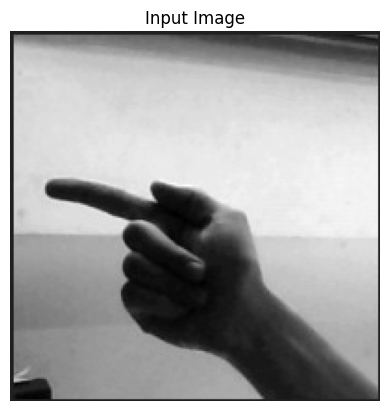

1/1 [==============================] - 0s 32ms/step
Predicted Sign: G


In [22]:
import matplotlib.pyplot as plt
import cv2
import numpy as np

def predict_and_display(image_path):
    # Load and preprocess the image
    img_array = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    resized_array = cv2.resize(img_array, (img_size, img_size)).reshape(-1, img_size, img_size, 1) / 255.0
    
    # Display the image
    plt.imshow(img_array, cmap='gray')
    plt.title('Input Image')
    plt.axis('off')
    plt.show()
    
    # Make prediction
    prediction = model.predict(resized_array)
    predicted_label = categories[np.argmax(prediction)]
    
    # Display prediction
    print(f"Predicted Sign: {predicted_label}")

# Test the function
predict_and_display('/kaggle/input/asl-alphabet/asl_alphabet_test/asl_alphabet_test/G_test.jpg')